# 🐱 Schrödinger's Data 🐱

#### Vamos a cargar nuestras librerias

In [1]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Comando para ver todas las columnas de nuestros DataFrames.
pd.options.display.max_columns = None

#### Ahora vamos a cargar nuestros archivos a mergear

In [3]:
class Abrir_Archivos:
    #Creamos la clase para que por defecto los archivos deben estar guardados en una carpeta 
    # llamada "datos" para no pedir otro parametro en la clase. Aunque también se le podría
    #la ruta de cada archivo pero para este ejercicio sería poco practico.
    def __init__ (self,csv1,csv2,txt,xml,):
        self.csv1=csv1
        self.csv2=csv2
        self.txt=txt
        self.xml=xml
    
    # Función para abrir el archivo csv1
    def abrir_csv1(self):
        csv1 = pd.read_csv(f"./datos/{self.csv1}", index_col=0)
        return csv1
    
    #Función para abrir el csv 2
    def abrir_csv2(self):
        csv2 = pd.read_csv(f"./datos/{self.csv2}", index_col=0)
        return csv2
    
    #Función para abrir el archivo txt (Hacemos la función con el 
    #separador ";" por defecto para no meter otro parametro a la clase o un input)
    def abrir_txt(self):
        txt = pd.read_csv(f"./datos/{self.txt}", sep = ";",index_col=0)
        return txt
    
    #Funcion para abrir el archivo xml
    def abrir_xml(self):
        xml = pd.read_xml(f"./datos/{self.xml}")
        return xml
  

In [4]:
Archivos=Abrir_Archivos("data_remaning_kaggle.csv","exported_db_data.csv","data_txt_clean.txt","data_xml_clean.xml")
df_csv1=Archivos.abrir_csv1()
df_csv2=Archivos.abrir_csv2()
df_txt=Archivos.abrir_txt()
df_xml=Archivos.abrir_xml()

# HISTORIA DE USUARIA 1
### Unión automatizadaa de los ficheros

In [5]:
def merge (csv1,csv2,txt,xml):
    merge_1= xml.merge(txt, left_on = "index", right_on = "index")
    merge_2=merge_1.merge(csv2, left_on = "index", right_on = "index")
    merge_final=merge_2.merge(csv1, left_on = "index", right_on = "index")
    return merge_final

In [6]:
df=merge(df_csv1,df_csv2,df_txt,df_xml)

In [7]:
df.shape

(25973, 260)

In [8]:
df.sample(1)

,level_0,index,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
6075,6075,6075,170,18-21,Man,United States of America,Bachelor’s degree,Software Engineer,< 1 years,Python,A personal computer / desktop,More than 25 times,< 1 year,Other,0-49 employees,0,NaN,NaN,NaN,NaN,NaN,NaN,Python,Jupyter Notebook,None,Matplotlib,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
q30=df[['Q30_B_Part_1','Q30_B_Part_2','Q30_B_Part_3','Q30_B_Part_4',
                 'Q30_B_Part_5','Q30_B_Part_6','Q30_B_Part_7', 'Q30_B_OTHER']]

In [10]:
q30.stb.missing()

,missing,total,percent
Q30_B_Part_1,25973,25973,100.0
Q30_B_Part_2,25973,25973,100.0
Q30_B_Part_3,25973,25973,100.0
Q30_B_Part_4,25973,25973,100.0
Q30_B_Part_5,25973,25973,100.0
Q30_B_Part_6,25973,25973,100.0
Q30_B_Part_7,25973,25973,100.0
Q30_B_OTHER,25973,25973,100.0


### 👀 Falta agregar lo de guardar el archivo al terminar

# HISTORIA DE USUARIA 2
### Limpieza de los datos

### Unificamos y cambiamos el nombre de nuestras columnas

In [11]:
# Unificamos el nombre de las columnas de nuestro DataFrame
nuevas_columnas = {col: col.lower().replace(" ", "_") for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

df.rename(columns={'age':'q1_edad','gender':'q2_genero','q3':'q3_pais','q4':'q4_nivel_educativo','q5':'q5_puesto_actual',
 'q6':'q6_años_programando','q8':'q8_lenguaje_recomend','q20':'q20_sector_empresa','q21':'q21_num_empleados',
 'q22':'q22_perso_resp_equip_da','q23':'q23_incor_metod_nego_ml','q25':'q25_salario_anual','q41':'q41_tool_da_principal',
 'q7':'q7_lenguaje_mas_usado'},inplace=True)

### Eliminando las columnas que no ocuparemos en nuestro analisis

- Q1: What is your age (# years)?
- Q2: What is your gender?
- Q3: In which country do you currently reside?
- Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
- Q5: Select the title most similar to your current role (or most recent title if retired):
- Q6: For how many years have you been writing code and/or programming?
- Q7: What programming languages do you use on a regular basis? (Select all that apply)
- Q8: What programming language would you recommend an aspiring data scientist to learn first?
- Q9: Which of the following integrated development environments (IDE's) do you use on a regular basis? **A eliminar**
- Q10: Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) **A eliminar**
- Q11: What type of computing platform do you use most often for your data science projects? **A eliminar**
- Q12: Which types of specialized hardware do you use on a regular basis? (Select all that apply) **A eliminar**
- Q13: Approximately how many times have you used a TPU (tensor processing unit)? **A eliminar**
- Q14: What data visualization libraries or tools do you use on a regular basis? (Select all that apply) **A eliminar**
- Q15: For how many years have you used machine learning methods? **A eliminar**
- Q16: Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) **A eliminar**
- Q17: Which of the following ML algorithms do you use on a regular basis? (Select all that apply) **A eliminar**
- Q18: Which categories of computer vision methods do you use on a regular basis? (Select all that apply)**A eliminar**
- Q19: Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) **A eliminar**
- Q20: In what industry is your current employer/contract (or your most recent employer if retired)?
- Q21: What is the size of the company where you are employed?
- Q22: Approximately how many individuals are responsible for data science workloads at your place of business?
- Q23: Does your current employer incorporate machine learning methods into their business?
- Q24: Select any activities that make up an important part of your role at work: (Select all that apply) **A eliminar**
- Q25: What is your current yearly compensation (approximate $USD)?
- Q26: Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)? **A eliminar**
- Q27-A: Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)
- Q28: Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? **A eliminar**
- Q29-A: Do you use any of the following cloud computing products on a regular basis? (Select all that apply) **A eliminar**
- Q30-A: Do you use any of the following data storage products on a regular basis? (Select all that apply)**A eliminar**
- Q31-A: Do you use any of the following managed machine learning products on a regular basis? (Select all that apply)
- Q32-A: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)
- Q33: Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? **A eliminar**
- Q34-A: Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)
- Q35: Which of the following business intelligence tools do you use most often? **A eliminar**
- Q36-A: Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply)
- Q37-A: Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)8
- Q38-A: Do you use any tools to help manage machine learning experiments? (Select all that apply) **A eliminar**
- Q39: Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)
- Q40: On which platforms have you begun or completed data science courses? (Select all that apply)
- Q41: What is the primary tool that you use at work or school to analyze data? (Include text response)
- Q42: Who/what are your favorite media sources that report on data science topics? (Select all that apply) **A eliminar**
### Supplementary Questions:
- Q27-B: Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?
- Q29-B: In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)
- Q30-B: In the next 2 years, do you hope to become more familiar with any of these specific data storage products? (Select all that apply)
- Q31-B: In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply)
- Q32-B: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Q34-B: Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Q36-B: Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Q37-B: Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Q38-B: In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)


In [12]:
# La 30B se eliminó porque tenía el 100% de sus datos nulos en todas las partes 30a se eliminó iguaL
#Eliminé la 29 porque es redundate con la pregunta q27-A y tenía todos los datos nulos boorro la 29b porque no estáa para comparaar la A
#Eliminé la 38 porque tenia el 10% de sus datos nulos en todas sus partes


In [13]:
def eliminar_colum(dataframe):
    dataframe.drop(columns=['level_0','time','q11','q13','q15','q26','q33','q35','q9','q12','q14',
                 'q16','q17','q24','q10_part_1','q10_part_2','q10_part_3','q10_part_4','q10_part_5','q10_part_6',
                 'q10_part_7','q10_part_8','q10_part_9','q10_part_10','q10_part_11', 'q10_part_12','q10_part_13',
                 'q10_part_14','q10_part_15','q10_part_16','q10_other','q18_part_1','q18_part_2','q18_part_3',
                 'q18_part_4','q18_part_5','q18_part_6','q18_other','q19_part_1','q19_part_2','q19_part_3','q19_part_4',
                 'q19_part_5','q19_other','q28','q29_a_part_1','q29_a_part_2','q29_a_part_3','q29_a_part_4', 'q29_a_other',
                 'q29_b_part_1','q29_b_part_2','q29_b_part_3','q29_b_part_4','q29_b_other','q30_a_part_1','q30_a_part_2',
                 'q30_a_part_3','q30_a_part_4','q30_a_part_5','q30_a_part_6','q30_a_part_7','q30_a_other','q30_b_part_1',
                 'q30_b_part_2','q30_b_part_3','q30_b_part_4','q30_b_part_5','q30_b_part_6','q30_b_part_7', 'q30_b_other',
                 'q38_a_part_1','q38_a_part_2','q38_a_part_3','q38_a_part_4', 'q38_a_part_5', 'q38_a_part_6','q38_a_part_7',
                 'q38_a_part_8','q38_a_part_9','q38_a_part_10','q38_a_part_11','q38_a_other','q38_b_part_1','q38_b_part_2',
                 'q38_b_part_3','q38_b_part_4','q38_b_part_5','q38_b_part_6','q38_b_part_7','q38_b_part_8','q38_b_part_9',
                 'q38_b_part_10','q38_b_part_11','q38_b_other','q42_part_1','q42_part_2','q42_part_3','q42_part_4','q42_part_5', 
                 'q42_part_6','q42_part_7', 'q42_part_8', 'q42_part_9', 'q42_part_10','q42_part_11', 'q42_other',], axis=1, inplace=True)
    return dataframe

In [14]:
df=eliminar_colum(df)

df.shape

(25973, 153)

## Ordenando las columnas

In [15]:
# Hay que plantearse eliminar la cq32 y q34 ya que tienen muchas partes y nos ahorraría muchas columnas

In [16]:
lista_columnas=list(df.columns)
print(lista_columnas)

['index', 'q1_edad', 'q2_genero', 'q3_pais', 'q4_nivel_educativo', 'q5_puesto_actual', 'q6_años_programando', 'q8_lenguaje_recomend', 'q20_sector_empresa', 'q21_num_empleados', 'q22_perso_resp_equip_da', 'q23_incor_metod_nego_ml', 'q25_salario_anual', 'q41_tool_da_principal', 'q7_lenguaje_mas_usado', 'q32', 'q34', 'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4', 'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8', 'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other', 'q31_a_part_1', 'q31_a_part_2', 'q31_a_part_3', 'q31_a_part_4', 'q31_a_part_5', 'q31_a_part_6', 'q31_a_part_7', 'q31_a_part_8', 'q31_a_part_9', 'q31_a_other', 'q36_a_part_1', 'q36_a_part_2', 'q36_a_part_3', 'q36_a_part_4', 'q36_a_part_5', 'q36_a_part_6', 'q36_a_part_7', 'q36_a_other', 'q37_a_part_1', 'q37_a_part_2', 'q37_a_part_3', 'q37_a_part_4', 'q37_a_part_5', 'q37_a_part_6', 'q37_a_part_7', 'q37_a_other', 'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5', 'q39_par

In [17]:
nuevo_orden=['index','q1_edad','q2_genero','q3_pais','q4_nivel_educativo','q5_puesto_actual', 'q6_años_programando',
             'q7_lenguaje_mas_usado','q8_lenguaje_recomend','q20_sector_empresa','q21_num_empleados', 'q22_perso_resp_equip_da',
             'q23_incor_metod_nego_ml','q25_salario_anual','q27_a_part_1','q27_a_part_2','q27_a_part_3','q27_a_part_4',
             'q27_a_part_5','q27_a_part_6','q27_a_part_7','q27_a_part_8','q27_a_part_9','q27_a_part_10','q27_a_part_11', 
             'q27_a_other','q27_b_part_1','q27_b_part_2','q27_b_part_3','q27_b_part_4','q27_b_part_5','q27_b_part_6', 
             'q27_b_part_7','q27_b_part_8','q27_b_part_9','q27_b_part_10','q27_b_part_11', 'q27_b_other','q31_a_part_1', 
             'q31_a_part_2','q31_a_part_3','q31_a_part_4','q31_a_part_5','q31_a_part_6','q31_a_part_7','q31_a_part_8', 
             'q31_a_part_9','q31_a_other','q31_b_part_1','q31_b_part_2','q31_b_part_3','q31_b_part_4','q31_b_part_5','q31_b_part_6',
             'q31_b_part_7','q31_b_part_8','q31_b_part_9','q31_b_other','q32','q32_b_part_1','q32_b_part_2','q32_b_part_3',
             'q32_b_part_4','q32_b_part_5','q32_b_part_6','q32_b_part_7','q32_b_part_8','q32_b_part_9','q32_b_part_10',
             'q32_b_part_11','q32_b_part_12','q32_b_part_13','q32_b_part_14','q32_b_part_15','q32_b_part_16','q32_b_part_17',##ooojoooo PLANTEARSE ELIMINAR LA 32 TIENE MUCHAS PARTES
             'q32_b_part_18','q32_b_part_19','q32_b_part_20','q32_b_other', 'q34','q34_b_part_1','q34_b_part_2','q34_b_part_3',
             'q34_b_part_4','q34_b_part_5','q34_b_part_6','q34_b_part_7','q34_b_part_8','q34_b_part_9','q34_b_part_10',
             'q34_b_part_11','q34_b_part_12','q34_b_part_13','q34_b_part_14','q34_b_part_15','q34_b_part_16','q34_b_other',
             'q36_a_part_1','q36_a_part_2','q36_a_part_3','q36_a_part_4','q36_a_part_5','q36_a_part_6','q36_a_part_7','q36_a_other',
             'q36_b_part_1','q36_b_part_2','q36_b_part_3','q36_b_part_4','q36_b_part_5','q36_b_part_6','q36_b_part_7','q36_b_other',
             'q37_a_part_1','q37_a_part_2','q37_a_part_3','q37_a_part_4','q37_a_part_5','q37_a_part_6','q37_a_part_7','q37_a_other',
             'q37_b_part_1','q37_b_part_2','q37_b_part_3','q37_b_part_4','q37_b_part_5','q37_b_part_6','q37_b_part_7','q37_b_other',
             'q39_part_1','q39_part_2','q39_part_3','q39_part_4','q39_part_5','q39_part_6','q39_part_7','q39_part_8','q39_part_9','q39_other',
             'q40_part_1','q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9', 
             'q40_part_10', 'q40_part_11', 'q40_other','q41_tool_da_principal' ]

In [18]:
df=df.reindex(columns=nuevo_orden)

In [19]:
df.sample(1)

,index,q1_edad,q2_genero,q3_pais,q4_nivel_educativo,q5_puesto_actual,q6_años_programando,q7_lenguaje_mas_usado,q8_lenguaje_recomend,q20_sector_empresa,q21_num_empleados,q22_perso_resp_equip_da,q23_incor_metod_nego_ml,q25_salario_anual,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q27_b_part_1,q27_b_part_2,q27_b_part_3,q27_b_part_4,q27_b_part_5,q27_b_part_6,q27_b_part_7,q27_b_part_8,q27_b_part_9,q27_b_part_10,q27_b_part_11,q27_b_other,q31_a_part_1,q31_a_part_2,q31_a_part_3,q31_a_part_4,q31_a_part_5,q31_a_part_6,q31_a_part_7,q31_a_part_8,q31_a_part_9,q31_a_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q32,q32_b_part_1,q32_b_part_2,q32_b_part_3,q32_b_part_4,q32_b_part_5,q32_b_part_6,q32_b_part_7,q32_b_part_8,q32_b_part_9,q32_b_part_10,q32_b_part_11,q32_b_part_12,q32_b_part_13,q32_b_part_14,q32_b_part_15,q32_b_part_16,q32_b_part_17,q32_b_part_18,q32_b_part_19,q32_b_part_20,q32_b_other,q34,q34_b_part_1,q34_b_part_2,q34_b_part_3,q34_b_part_4,q34_b_part_5,q34_b_part_6,q34_b_part_7,q34_b_part_8,q34_b_part_9,q34_b_part_10,q34_b_part_11,q34_b_part_12,q34_b_part_13,q34_b_part_14,q34_b_part_15,q34_b_part_16,q34_b_other,q36_a_part_1,q36_a_part_2,q36_a_part_3,q36_a_part_4,q36_a_part_5,q36_a_part_6,q36_a_part_7,q36_a_other,q36_b_part_1,q36_b_part_2,q36_b_part_3,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_a_part_1,q37_a_part_2,q37_a_part_3,q37_a_part_4,q37_a_part_5,q37_a_part_6,q37_a_part_7,q37_a_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q41_tool_da_principal
23607,23607,25-29,Woman,Malaysia,Doctoral degree,Student,3-5 years,"Python, C++, MATLAB",Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web Services (AWS),NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon SageMaker,NaN,Google Cloud Vertex AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud BigQuery,Google Cloud SQL,Google Cloud Firestore,Google Cloud BigTable,Google Cloud Spanner,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,Automated hyperparameter tuning (e.g. hyperopt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,Amazon Sagemaker Autopilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."


## Procesando los nulos...

In [20]:
df.replace(np.nan, "Unknow", inplace = True)

In [21]:
df.stb.missing()

,missing,total,percent
index,0,25973,0.0
q36_a_other,0,25973,0.0
q36_a_part_1,0,25973,0.0
q36_a_part_2,0,25973,0.0
q36_a_part_3,0,25973,0.0
...,...,...,...
q31_b_part_5,0,25973,0.0
q31_b_part_6,0,25973,0.0
q31_b_part_7,0,25973,0.0
q31_b_part_8,0,25973,0.0


In [22]:
df.duplicated().sum()

0

# HISTORIA DE USUARIA 3
### Análisis exploratorio de datos

In [23]:
def info (df, nombre_archivo):
    try:
        ejem=df.head(5)
        tail=df.tail(5)
        shap=pd.DataFrame(df.shape)
        describ=df.describe(include="O").T
        tipes=df.dtypes
        nulos=df.stb.missing()
        with pd.ExcelWriter(f"datos/{nombre_archivo}") as writer:
            ejem.to_excel(writer, sheet_name="Head")
            tail.to_excel(writer, sheet_name="Tail")
            shap.to_excel(writer, sheet_name="Shape")
            describ.to_excel(writer, sheet_name="Describe")
            tipes.to_excel(writer, sheet_name="Types")
            nulos.to_excel(writer, sheet_name="Nulos")       
        return "Se ha creado tu archivo con los estadisticos de tu DataFrame"
    except:
        print("No podemos realizar tu petición. Verifica el nombre de tu DataFrame o el nombre de tu archivo y si pusiste la extención")
        return

In [24]:
info(df,"prueba.xlsx")

'Se ha creado tu archivo con los estadisticos de tu DataFrame'

crear función que itere por bloques (preguntas) y muestre los estadisticos de dichos bloques

In [25]:

def info_columnas(df,columnas, nombre_archivo):

    for i in columnas:
      descrip=df[i].describe()
      unicos=pd.DataFrame(df[i].unique())
      valores=df.value_counts([i])
      frecuencia=df.stb.freq([i])
      nulos=df.stb.missing([i])
  
    with pd.ExcelWriter(f"datos/{nombre_archivo}") as writer:  
      descrip.to_excel(writer, sheet_name="Descripcion")
      unicos.to_excel(writer, sheet_name="Unicos")
      valores.to_excel(writer, sheet_name="Value counts")
      frecuencia.to_excel(writer, sheet_name="Frecuencia")
      nulos.to_excel(writer, sheet_name="Nulos")
    return "Se ha creado tu archivo con los estadisticos de tus columnas seleccionadas"
      
    

In [26]:
#Creamos todos los grupos
grupo_bloque1=df.groupby(['q1_edad','q2_genero','q3_pais','q4_nivel_educativo','q5_puesto_actual',
 'q6_años_programando','q40_part_1','q40_part_2','q40_part_3','q40_part_4',
 'q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9','q40_part_10',
 'q40_part_11','q40_other']) #Es una lista con los nombres

grupo_bloque2=['q20_sector_empresa','q21_num_empleados','q22_perso_resp_equip_da','q25_salario_anual']

grupo_bloque3_tools=['q39_part_1','q39_part_2','q39_part_3','q39_part_4','q39_part_5',
                     'q39_part_6','q39_part_7','q39_part_8','q39_part_9','q39_other','q40_part_1',
                     'q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6',
                     'q40_part_7','q40_part_8','q40_part_9','q40_part_10','q40_part_11','q40_other']

grupo_programa=['q8_lenguaje_recomend','q7_lenguaje_mas_usado']

grupo_nube=['q27_a_part_1','q27_a_part_2','q27_a_part_3','q27_a_part_4','q27_a_part_5','q27_a_part_6','q27_a_part_7',
            'q27_a_part_8','q27_a_part_9','q27_a_part_10','q27_a_part_11','q27_a_other','q27_b_part_1','q27_b_part_2',
            'q27_b_part_3','q27_b_part_4','q27_b_part_5','q27_b_part_6','q27_b_part_7','q27_b_part_8','q27_b_part_9',
            'q27_b_part_10','q27_b_part_11','q27_b_other']

grupo_bigdata=['q32','q32_b_part_1','q32_b_part_2','q32_b_part_3','q32_b_part_4','q32_b_part_5','q32_b_part_6',
               'q32_b_part_7','q32_b_part_8','q32_b_part_9','q32_b_part_10','q32_b_part_11','q32_b_part_12',
               'q32_b_part_13','q32_b_part_14','q32_b_part_15','q32_b_part_16','q32_b_part_17','q32_b_part_18',
               'q32_b_part_19','q32_b_part_20','q32_b_other']

grupo_admin_ml=['q31_a_part_1','q31_a_part_2','q31_a_part_3','q31_a_part_4','q31_a_part_5','q31_a_part_6',
                'q31_a_part_7','q31_a_part_8','q31_a_part_9','q31_a_other','q31_b_part_1','q31_b_part_2',
                'q31_b_part_3','q31_b_part_4','q31_b_part_5','q31_b_part_6','q31_b_part_7','q31_b_part_8',
                'q31_b_part_9','q31_b_other']

grupo_tool_comer_ml=['q34','q34_b_part_1','q34_b_part_2','q34_b_part_3','q34_b_part_4','q34_b_part_5','q34_b_part_6',
                      'q34_b_part_7','q34_b_part_8','q34_b_part_9','q34_b_part_10','q34_b_part_11','q34_b_part_12',
                      'q34_b_part_13','q34_b_part_14','q34_b_part_15','q34_b_part_16','q34_b_other']

grupo_tool_catego_ml=['q36_a_part_1','q36_a_part_2','q36_a_part_3','q36_a_part_4','q36_a_part_5',
                       'q36_a_part_6','q36_a_part_7','q36_a_other','q36_b_part_1','q36_b_part_2',
                       'q36_b_part_3','q36_b_part_4','q36_b_part_5','q36_b_part_6','q36_b_part_7','q36_b_other']

grupo_tool_ml=['q37_a_part_1','q37_a_part_2','q37_a_part_3','q37_a_part_4','q37_a_part_5','q37_a_part_6',
                'q37_a_part_7','q37_a_other','q37_b_part_1','q37_b_part_2','q37_b_part_3','q37_b_part_4',
                'q37_b_part_5','q37_b_part_6','q37_b_part_7','q37_b_other']

valores=['index','q2_genero']

In [27]:
grupo_bloque1

In [28]:
info_columnas(df,grupo_bloque2,"prueba_columna.xlsx")

'Se ha creado tu archivo con los estadisticos de tus columnas seleccionadas'

In [29]:
categoricas = df.select_dtypes(include = "object")

# HISTORIA DE USUARIA 4
### Obtencion de gráficos

#### Separamos por bloques que vamos a analizar

#### Bloque 1

In [30]:
bloque1=df[['q1_edad','q2_genero','q3_pais','q4_nivel_educativo','q5_puesto_actual',
 'q6_años_programando','q40_part_1','q40_part_2','q40_part_3','q40_part_4',
 'q40_part_5','q40_part_6','q40_part_7','q40_part_8','q40_part_9','q40_part_10',
 'q40_part_11','q40_other',]]

bloque1.stb.missing()

,missing,total,percent
q1_edad,0,25973,0.0
q2_genero,0,25973,0.0
q40_part_11,0,25973,0.0
q40_part_10,0,25973,0.0
q40_part_9,0,25973,0.0
q40_part_8,0,25973,0.0
q40_part_7,0,25973,0.0
q40_part_6,0,25973,0.0
q40_part_5,0,25973,0.0
q40_part_4,0,25973,0.0


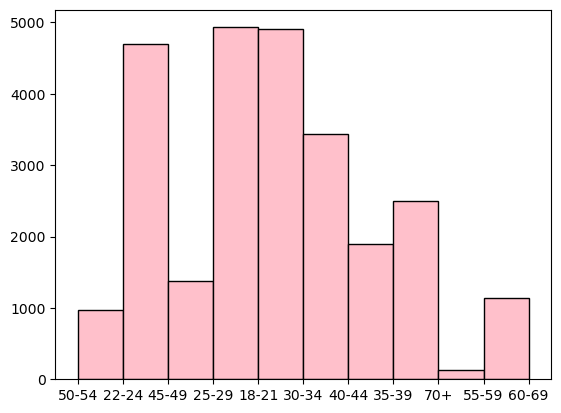

In [31]:
plt.hist(x = df["q1_edad"],ec= 'black', color='pink')
plt.show() 

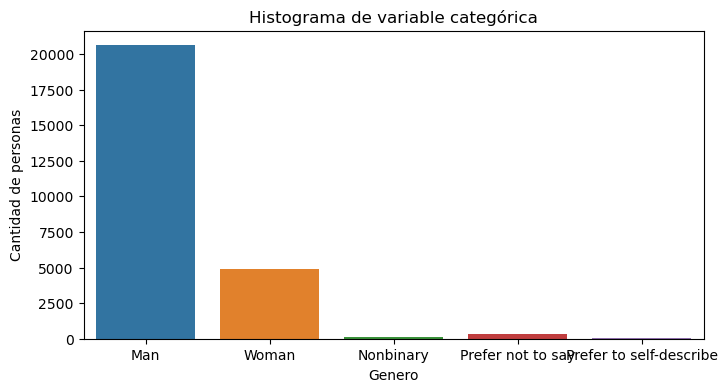

In [32]:
plt.figure(figsize =(8,4))
fig = sns.countplot(x='q2_genero', data = bloque1)
fig.set(xlabel='Genero', ylabel= 'Cantidad de personas' )
fig.set_title('Histograma de variable categórica')
plt.show()

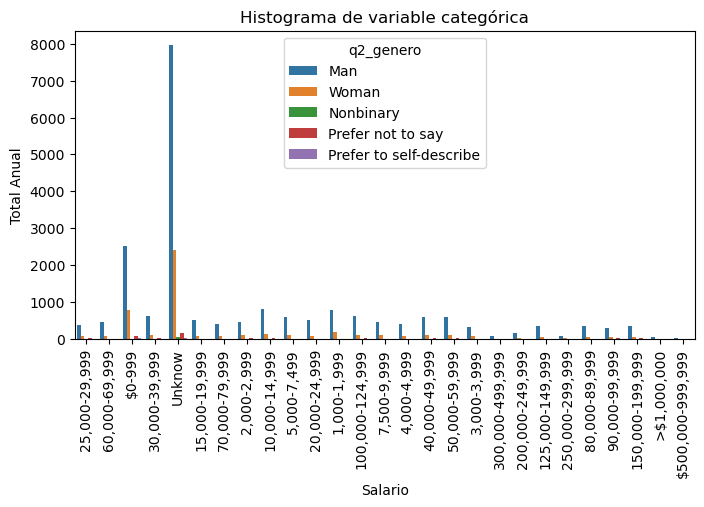

In [33]:
plt.figure(figsize =(8,4))
fig = sns.countplot(x='q25_salario_anual', data = df, hue = 'q2_genero')
fig.set(xlabel='Salario', ylabel= 'Total Anual' )
fig.set_title('Histograma de variable categórica')
plt.xticks(rotation = 90)
plt.show()

#### Bloque 2

In [34]:
bloque2=df[['q20_sector_empresa','q21_num_empleados','q22_perso_resp_equip_da','q25_salario_anual']]

bloque2.stb.missing()

,missing,total,percent
q20_sector_empresa,0,25973,0.0
q21_num_empleados,0,25973,0.0
q22_perso_resp_equip_da,0,25973,0.0
q25_salario_anual,0,25973,0.0


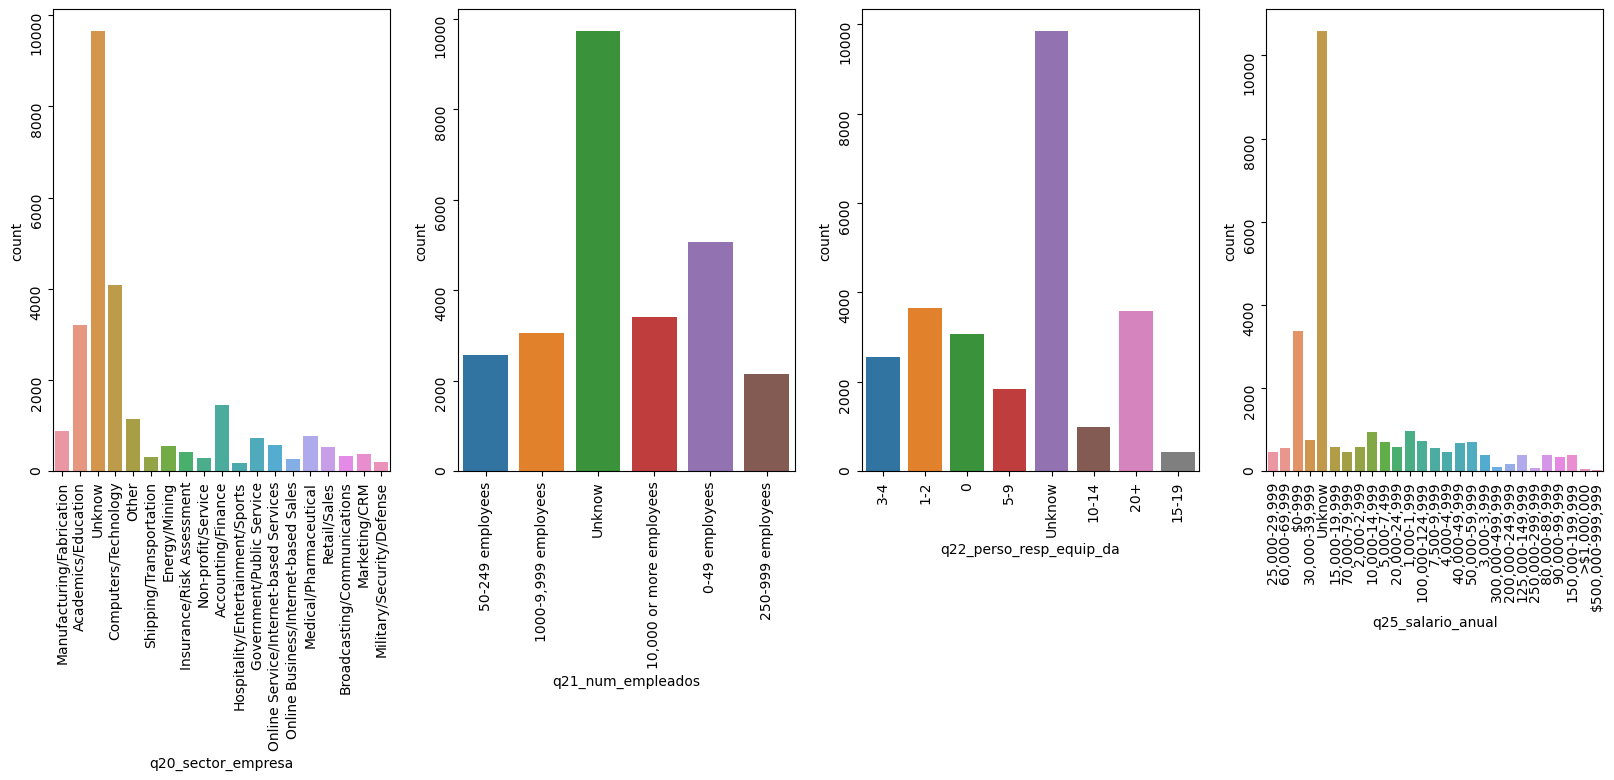

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20,6))

for ax in fig.axes:
    ax.tick_params(labelrotation=90)

for i in range(len(bloque2.columns)):
    sns.countplot(x = bloque2.columns[i], data = df, ax=axes[i]); 
plt.show(); 

##### Bloque 3 Herramientas DA

In [36]:
q39_compart_codig=df[['q39_part_1','q39_part_2','q39_part_3','q39_part_4','q39_part_5',
                     'q39_part_6','q39_part_7','q39_part_8','q39_part_9','q39_other']]

q40_plataform_cursos=df[['q40_part_1','q40_part_2','q40_part_3','q40_part_4','q40_part_5','q40_part_6',
                         'q40_part_7','q40_part_8','q40_part_9','q40_part_10','q40_part_11','q40_other']]

#### Bloque 3 actualidad - Futuro

Programacion (q7, q8 (recomendación))

In [37]:
df_prog= df[['q8_lenguaje_recomend','q7_lenguaje_mas_usado']]

df_prog.stb.missing()

,missing,total,percent
q8_lenguaje_recomend,0,25973,0.0
q7_lenguaje_mas_usado,0,25973,0.0


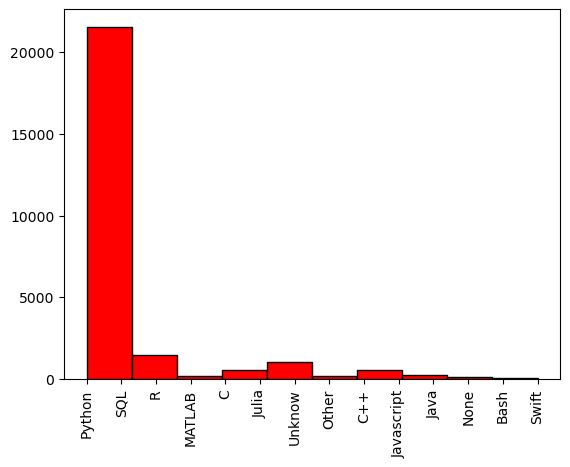

In [38]:
plt.hist(x = df["q8_lenguaje_recomend"],ec= 'black', color='red')
plt.xticks(rotation = 90)
plt.show() 

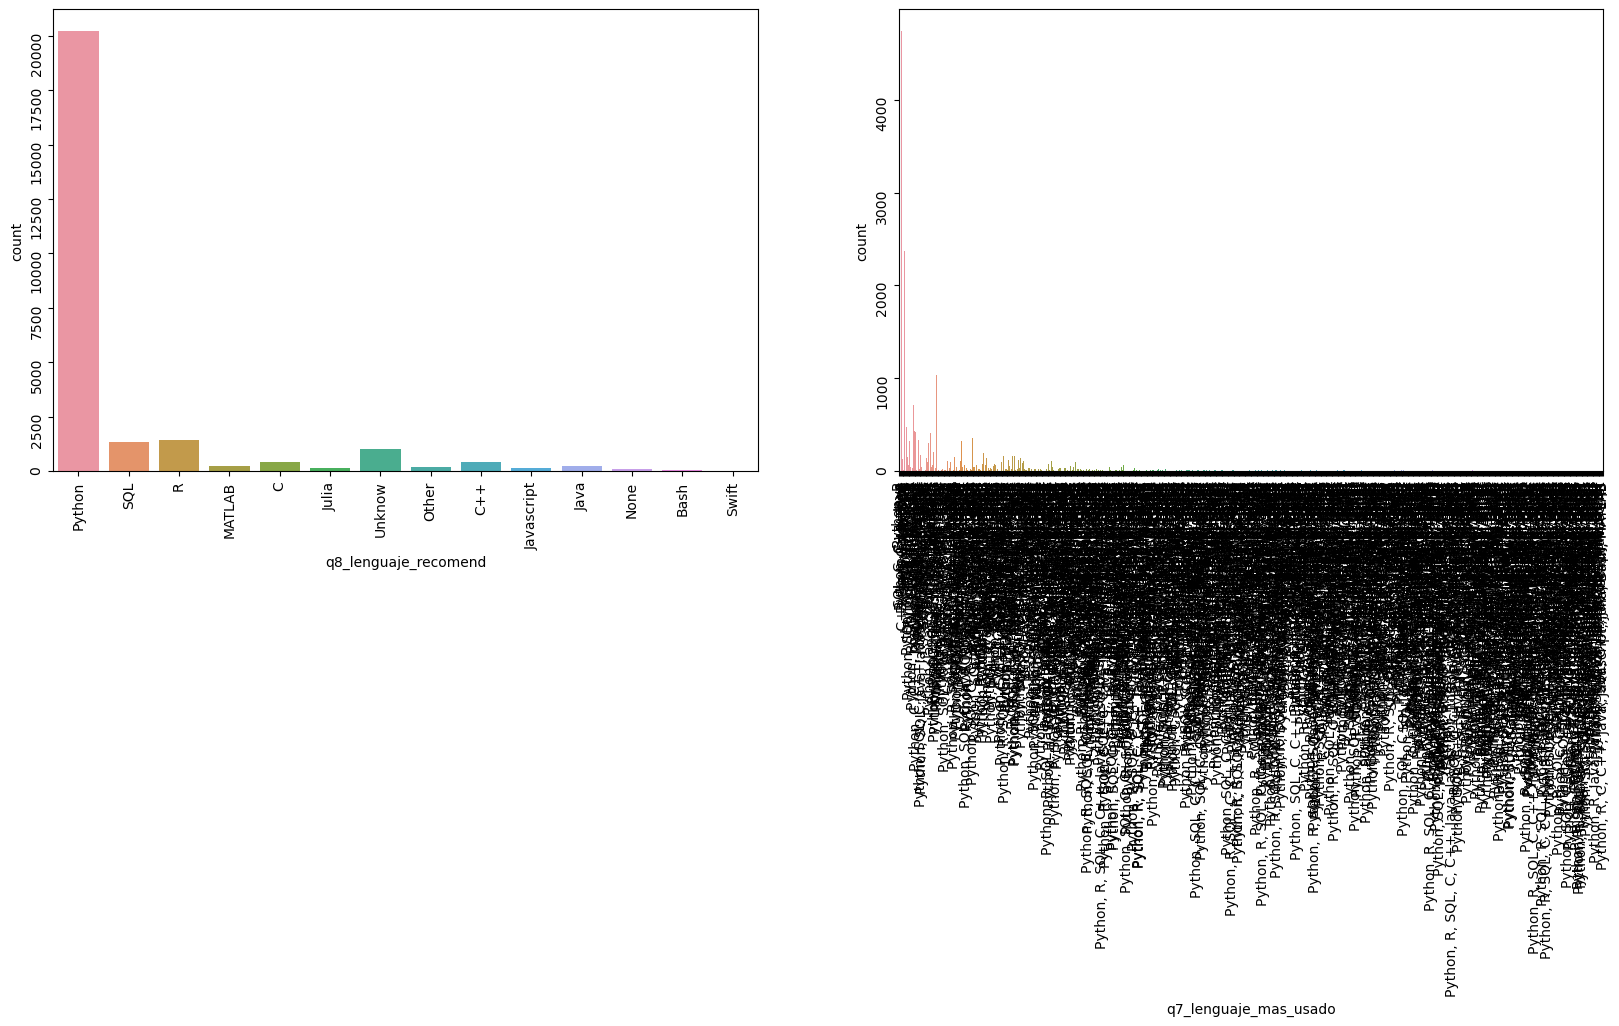

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))

for ax in fig.axes:
    ax.tick_params(labelrotation=90)

for i in range(len(df_prog.columns)):
    sns.countplot(x = df_prog.columns[i], data = df, ax=axes[i]); 
plt.show(); 

Nube (Q27-A, Q27-B)

In [40]:
df_nube=df[['q27_a_part_1','q27_a_part_2','q27_a_part_3','q27_a_part_4','q27_a_part_5','q27_a_part_6','q27_a_part_7',
            'q27_a_part_8','q27_a_part_9','q27_a_part_10','q27_a_part_11','q27_a_other','q27_b_part_1','q27_b_part_2',
            'q27_b_part_3','q27_b_part_4','q27_b_part_5','q27_b_part_6','q27_b_part_7','q27_b_part_8','q27_b_part_9',
            'q27_b_part_10','q27_b_part_11','q27_b_other']]

df_nube.stb.missing()

,missing,total,percent
q27_a_part_1,0,25973,0.0
q27_a_part_2,0,25973,0.0
q27_b_part_11,0,25973,0.0
q27_b_part_10,0,25973,0.0
q27_b_part_9,0,25973,0.0
q27_b_part_8,0,25973,0.0
q27_b_part_7,0,25973,0.0
q27_b_part_6,0,25973,0.0
q27_b_part_5,0,25973,0.0
q27_b_part_4,0,25973,0.0


BIG DATA (Q32-A, Q32-B)

In [41]:
df_bigdata=df[['q32','q32_b_part_1','q32_b_part_2','q32_b_part_3','q32_b_part_4','q32_b_part_5','q32_b_part_6',
               'q32_b_part_7','q32_b_part_8','q32_b_part_9','q32_b_part_10','q32_b_part_11','q32_b_part_12',
               'q32_b_part_13','q32_b_part_14','q32_b_part_15','q32_b_part_16','q32_b_part_17','q32_b_part_18',
               'q32_b_part_19','q32_b_part_20','q32_b_other']]

df_bigdata.stb.missing()

,missing,total,percent
q32,0,25973,0.0
q32_b_part_1,0,25973,0.0
q32_b_part_20,0,25973,0.0
q32_b_part_19,0,25973,0.0
q32_b_part_18,0,25973,0.0
q32_b_part_17,0,25973,0.0
q32_b_part_16,0,25973,0.0
q32_b_part_15,0,25973,0.0
q32_b_part_14,0,25973,0.0
q32_b_part_13,0,25973,0.0


Machine learning

Administración Machine Learning (Q31-A, Q31-B)

In [42]:
df_admin_ml=df[['q31_a_part_1','q31_a_part_2','q31_a_part_3','q31_a_part_4','q31_a_part_5','q31_a_part_6',
                'q31_a_part_7','q31_a_part_8','q31_a_part_9','q31_a_other','q31_b_part_1','q31_b_part_2',
                'q31_b_part_3','q31_b_part_4','q31_b_part_5','q31_b_part_6','q31_b_part_7','q31_b_part_8',
                'q31_b_part_9','q31_b_other']]

df_admin_ml.stb.missing()

,missing,total,percent
q31_a_part_1,0,25973,0.0
q31_a_part_2,0,25973,0.0
q31_b_part_9,0,25973,0.0
q31_b_part_8,0,25973,0.0
q31_b_part_7,0,25973,0.0
q31_b_part_6,0,25973,0.0
q31_b_part_5,0,25973,0.0
q31_b_part_4,0,25973,0.0
q31_b_part_3,0,25973,0.0
q31_b_part_2,0,25973,0.0


Herramientas inteligencia comercial ML (Q34-A, Q34-B)

In [43]:
tools_ml_comercial=df[['q34','q34_b_part_1','q34_b_part_2','q34_b_part_3','q34_b_part_4','q34_b_part_5','q34_b_part_6',
                      'q34_b_part_7','q34_b_part_8','q34_b_part_9','q34_b_part_10','q34_b_part_11','q34_b_part_12',
                      'q34_b_part_13','q34_b_part_14','q34_b_part_15','q34_b_part_16','q34_b_other']]

tools_ml_comercial.stb.missing()

,missing,total,percent
q34,0,25973,0.0
q34_b_part_1,0,25973,0.0
q34_b_part_16,0,25973,0.0
q34_b_part_15,0,25973,0.0
q34_b_part_14,0,25973,0.0
q34_b_part_13,0,25973,0.0
q34_b_part_12,0,25973,0.0
q34_b_part_11,0,25973,0.0
q34_b_part_10,0,25973,0.0
q34_b_part_9,0,25973,0.0


Herramientas Machine Learning categorias (Q36-A, Q36-B)

In [44]:
df_tools_catego_ml=df[['q36_a_part_1','q36_a_part_2','q36_a_part_3','q36_a_part_4','q36_a_part_5',
                       'q36_a_part_6','q36_a_part_7','q36_a_other','q36_b_part_1','q36_b_part_2',
                       'q36_b_part_3','q36_b_part_4','q36_b_part_5','q36_b_part_6','q36_b_part_7','q36_b_other']]

df_tools_catego_ml.stb.missing()

,missing,total,percent
q36_a_part_1,0,25973,0.0
q36_a_part_2,0,25973,0.0
q36_a_part_3,0,25973,0.0
q36_a_part_4,0,25973,0.0
q36_a_part_5,0,25973,0.0
q36_a_part_6,0,25973,0.0
q36_a_part_7,0,25973,0.0
q36_a_other,0,25973,0.0
q36_b_part_1,0,25973,0.0
q36_b_part_2,0,25973,0.0


Herramientas Machine Learning (Q37-A, Q37-B)

In [45]:
df_tools_ml=df[['q37_a_part_1','q37_a_part_2','q37_a_part_3','q37_a_part_4','q37_a_part_5','q37_a_part_6',
                'q37_a_part_7','q37_a_other','q37_b_part_1','q37_b_part_2','q37_b_part_3','q37_b_part_4',
                'q37_b_part_5','q37_b_part_6','q37_b_part_7','q37_b_other']]

df_tools_ml.stb.missing()

,missing,total,percent
q37_a_part_1,0,25973,0.0
q37_a_part_2,0,25973,0.0
q37_a_part_3,0,25973,0.0
q37_a_part_4,0,25973,0.0
q37_a_part_5,0,25973,0.0
q37_a_part_6,0,25973,0.0
q37_a_part_7,0,25973,0.0
q37_a_other,0,25973,0.0
q37_b_part_1,0,25973,0.0
q37_b_part_2,0,25973,0.0


### Uniendo columnas

In [46]:
# He decidido no unir las columnaas con explode

In [47]:
def unir_columnas(df,nombre_columna,lista_columnas): ## No funciona
    df[nombre_columna]=df[[lista_columnas]].agg(','.join, axis=1)
    df[nombre_columna] = df[nombre_columna].str.replace('NAN,', '')
    df[nombre_columna] = df[nombre_columna].str.replace(',NAN', '')
    df[nombre_columna] = df[nombre_columna].apply(lambda x: x.split(','))
    df=df.explode(nombre_columna)
    return df

In [48]:
colum_q31=['q31_a_part_1','q31_a_part_2','q31_a_part_3','q31_a_part_4','q31_a_part_5','q31_a_part_6',
           'q31_a_part_7','q31_a_part_8','q31_a_part_9','q31_a_other']